In [10]:
import numpy as np
import cv2

# Function to perform image augmentation (rotation and brightness) on both image and mask
def augment_image_and_mask(image, mask):
    rows, cols = image.shape[:2]

    # Random rotation between -10 to 10 degrees
    random_angle = np.random.randint(-10, 11)
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), random_angle, 1)

    # Apply the same rotation to both image and mask
    augmented_image = cv2.warpAffine(image, M, (cols, rows))
    augmented_mask = cv2.warpAffine(mask, M, (cols, rows), flags=cv2.INTER_NEAREST)

    # Random brightness adjustment (applies only to the image, not the mask)
    brightness_factor = np.random.uniform(0.7, 1.3)
    hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2HSV)
    hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2] * brightness_factor, 0, 255)
    augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

    return augmented_image, augmented_mask

# Load train images and masks
train_images = np.load("../../numpy_arr_data/train_img_224.npy")
train_masks = np.load("../../numpy_arr_data/train_mask_224.npy")

# Lists to store augmented images and masks
augmented_images = []
augmented_masks = []

# Augment all images and store them
for i in range(2975):
    augmented_image, augmented_mask = augment_image_and_mask(train_images[i], train_masks[i])
    augmented_images.append(augmented_image)
    augmented_masks.append(augmented_mask)

In [11]:
train_images.shape, train_masks.shape

((2975, 224, 224, 3), (2975, 224, 224, 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


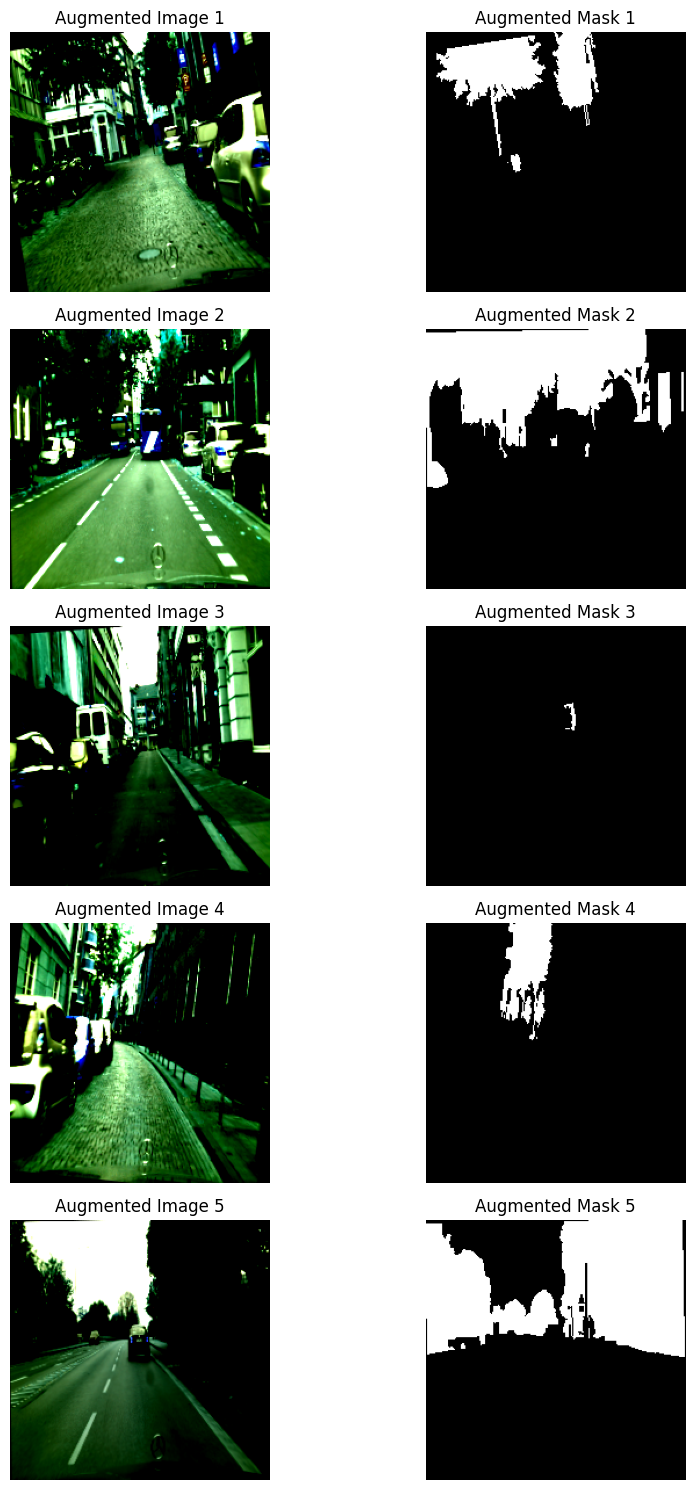

In [12]:
import matplotlib.pyplot as plt
# Number of images to display
n_images_to_show = 5

# Create a figure to plot images and masks side by side
fig, axes = plt.subplots(n_images_to_show, 2, figsize=(10, n_images_to_show * 3))

for i in range(n_images_to_show):
    # Display the augmented image
    axes[i, 0].imshow(augmented_images[i])
    axes[i, 0].set_title(f"Augmented Image {i+1}")
    axes[i, 0].axis('off')
    
    # Display the corresponding augmented mask
    axes[i, 1].imshow(augmented_masks[i], cmap='gray')
    axes[i, 1].set_title(f"Augmented Mask {i+1}")
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
# Convert the lists to NumPy arrays
augmented_images_np = np.array(augmented_images)
augmented_masks_np = np.array(augmented_masks)

# Save the augmented images and masks as .npy files
np.save("../../numpy_arr_data/augmented_images.npy", augmented_images_np)
np.save("../../numpy_arr_data/augmented_masks.npy", augmented_masks_np)

In [14]:
augmented_images_np.shape, augmented_masks_np.shape

((2975, 224, 224, 3), (2975, 224, 224))

In [16]:
import numpy as np
import cv2
import tensorflow as tf

# Function to perform image augmentation (rotation and brightness) on both image and mask
def augment_image_and_mask(image, mask):
    rows, cols = image.shape[:2]

    # Random rotation between -10 to 10 degrees
    random_angle = np.random.randint(-10, 11)
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), random_angle, 1)

    # Apply the same rotation to both image and mask
    augmented_image = cv2.warpAffine(image, M, (cols, rows))
    augmented_mask = cv2.warpAffine(mask, M, (cols, rows), flags=cv2.INTER_NEAREST)

    # Random brightness adjustment (applies only to the image, not the mask)
    brightness_factor = np.random.uniform(0.7, 1.3)
    hsv_image = cv2.cvtColor(augmented_image, cv2.COLOR_RGB2HSV)
    hsv_image[:, :, 2] = np.clip(hsv_image[:, :, 2] * brightness_factor, 0, 255)
    augmented_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

    return augmented_image, augmented_mask

# Load train images and masks
test_image = np.load("../../numpy_arr_data/test_img.npy")
mask_image = np.load("../../numpy_arr_data/test_vegetation_mask_gray_img.npy")
mask_image = mask_image[...,np.newaxis]

test_image = [tf.image.resize(images, (224, 224)).numpy() for images in test_image]
mask_image = [tf.image.resize(mask, (224, 224)).numpy() for mask in mask_image]

In [17]:
# Lists to store augmented images and masks
augmented_images = []
augmented_masks = []

# Augment all images and store them
for i in range(500):
    augmented_image, augmented_mask = augment_image_and_mask(test_image[i], mask_image[i])
    augmented_images.append(augmented_image)
    augmented_masks.append(augmented_mask)
    
# Convert the lists to NumPy arrays
augmented_images_np = np.array(augmented_images)
augmented_masks_np = np.array(augmented_masks)

# Save the augmented images and masks as .npy files
np.save("../../numpy_arr_data/augmented_test_images.npy", augmented_images_np)
np.save("../../numpy_arr_data/augmented_test_masks.npy", augmented_masks_np)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


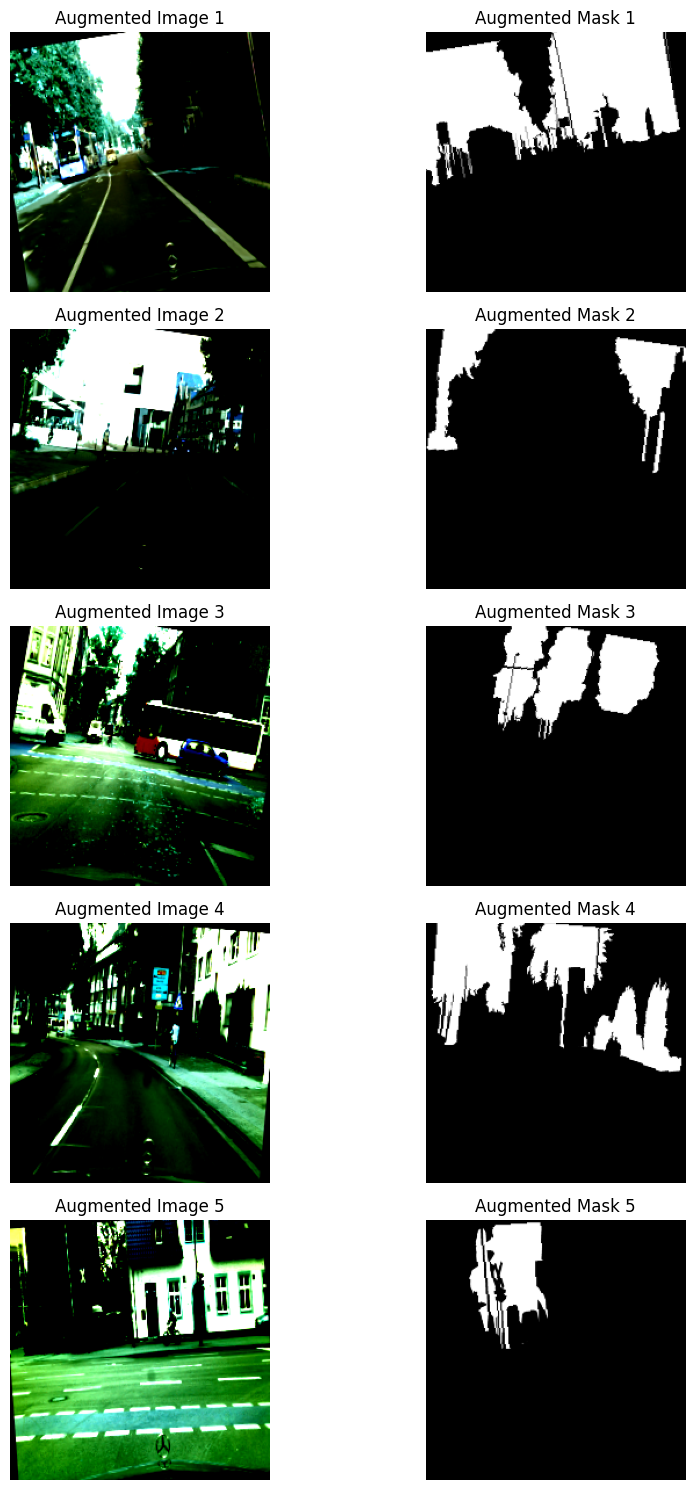

In [18]:
import matplotlib.pyplot as plt
# Number of images to display
n_images_to_show = 5

# Create a figure to plot images and masks side by side
fig, axes = plt.subplots(n_images_to_show, 2, figsize=(10, n_images_to_show * 3))

for i in range(n_images_to_show):
    # Display the augmented image
    axes[i, 0].imshow(augmented_images[i])
    axes[i, 0].set_title(f"Augmented Image {i+1}")
    axes[i, 0].axis('off')
    
    # Display the corresponding augmented mask
    axes[i, 1].imshow(augmented_masks[i], cmap='gray')
    axes[i, 1].set_title(f"Augmented Mask {i+1}")
    axes[i, 1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()